In [127]:
import numpy as np
import sep

Additional setup for reading the test image and displaying plots

In [128]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

Taking the data from the image given.

In [129]:
hdulist = fits.open('image.fits')
data = hdulist[0].data

Show the image

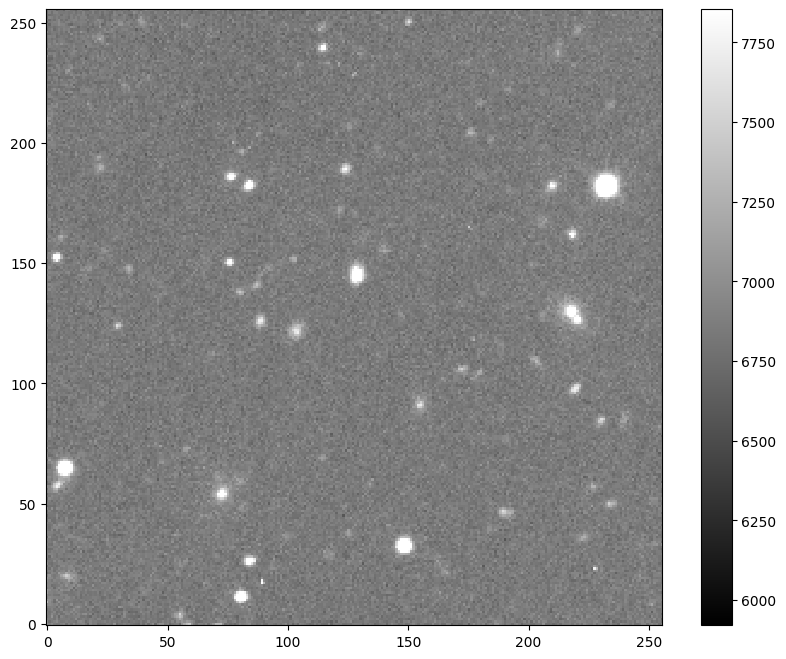

In [130]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

Measure a spatially varying background on the image.

In [131]:
bkg = sep.Background(data)

Get a "global" mean and noise of the image background:

In [132]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


Evaluate background as 2-d array, same size as original image

In [133]:
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

Show the background.

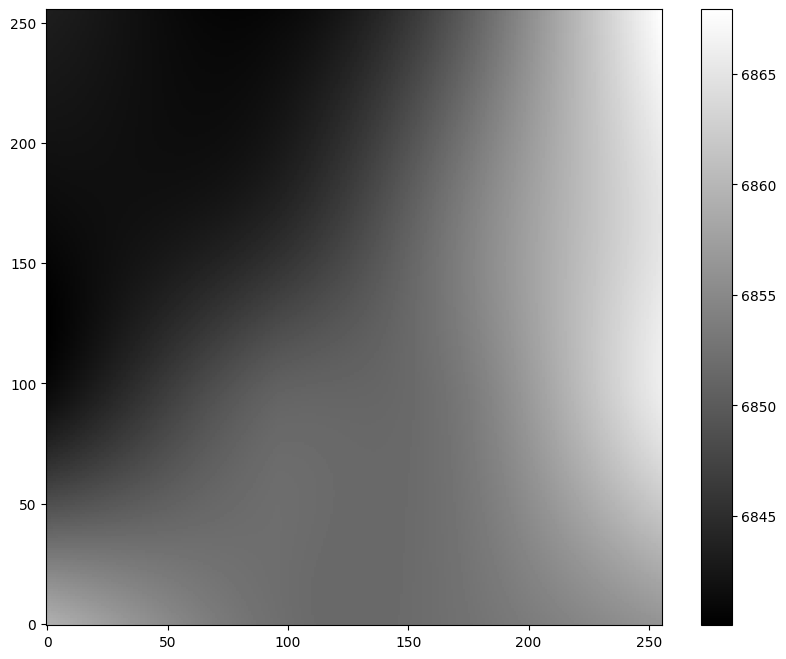

In [134]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

Evaluate the background noise as 2-d array, same size as original image

In [135]:
bkg_rms = bkg.rms()

Show the background noise

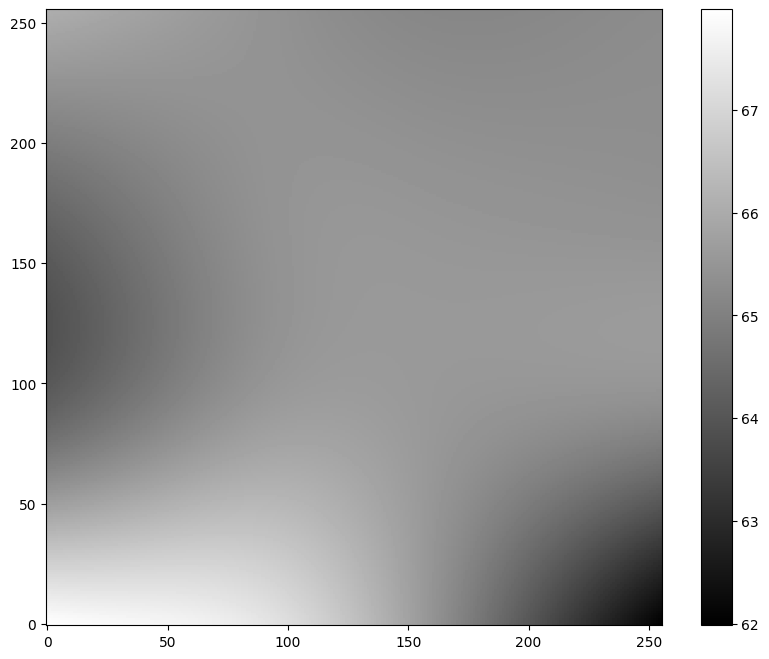

In [136]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

Subtract the background

In [137]:
data_sub = data - bkg

In [138]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

How many objects were detected

In [139]:
len(objects)

68

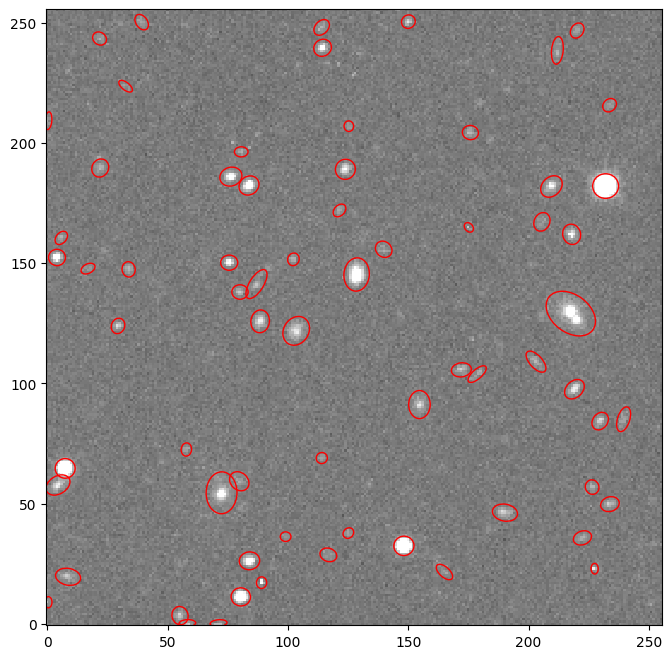

In [140]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [141]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [142]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

Show the first 10 objects results:

In [143]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141


Display and save the image

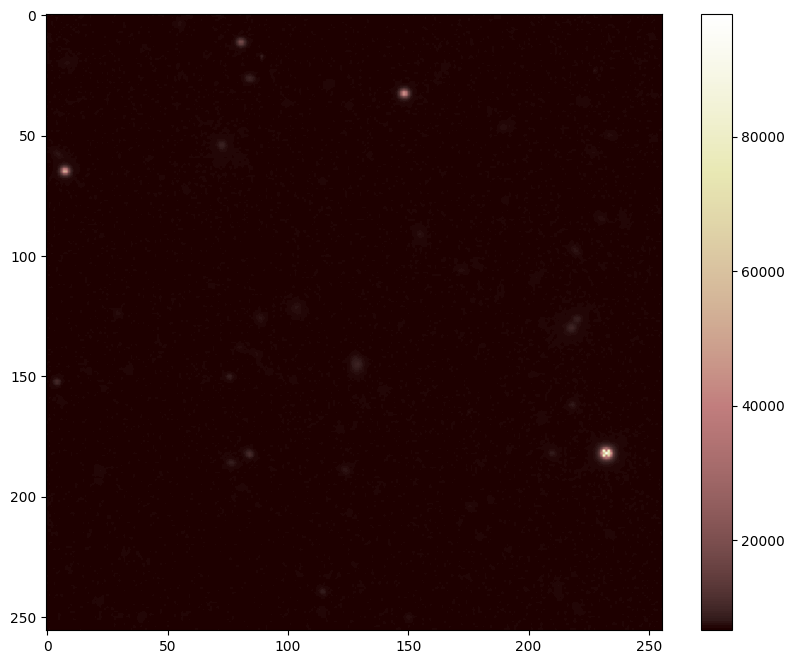

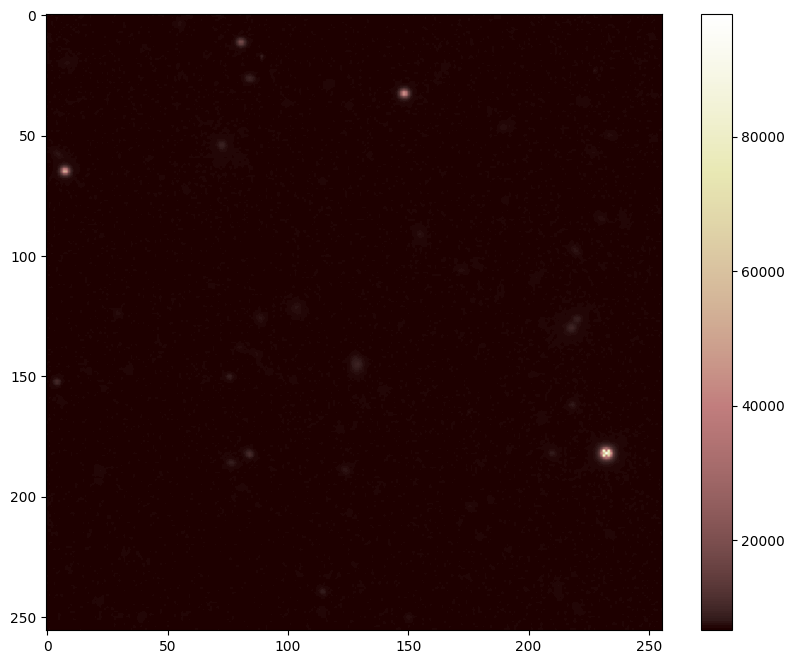

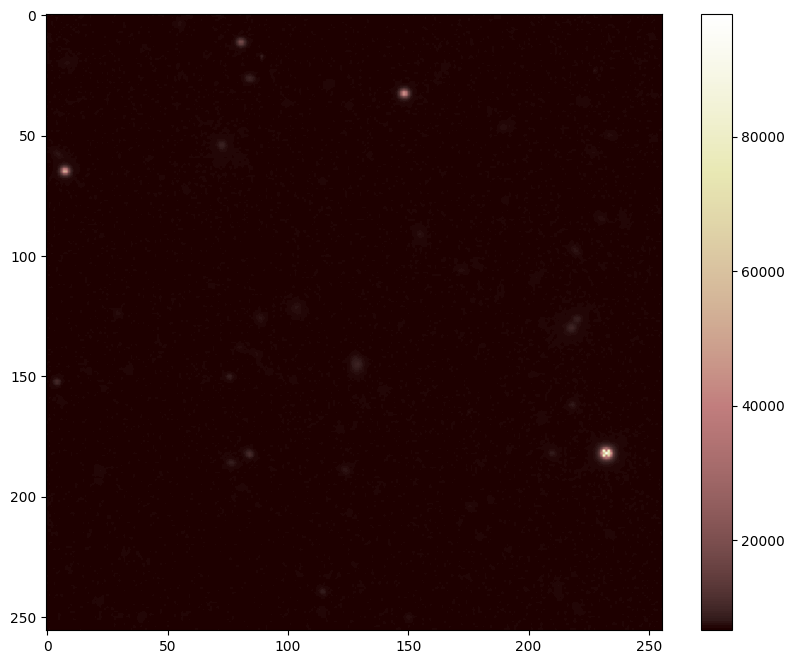

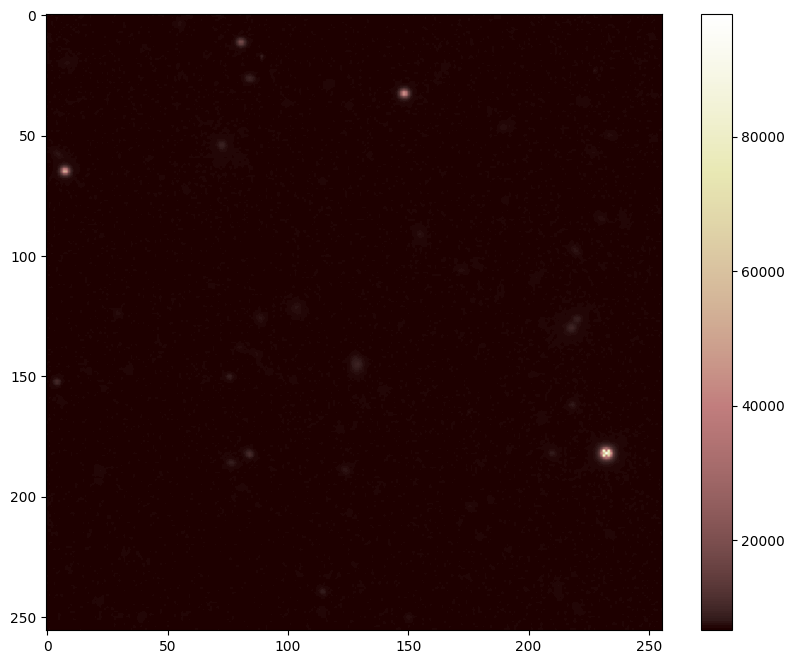

In [144]:
for i in range(4):
    plt.imshow(data, cmap='pink')
    plt.colorbar()
    plt.savefig(f'image{i}.png')
    plt.show()


# Writing data to a new FITS file
fits.writeto('output.fits', data, overwrite=True)